In [116]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram
from math import pi
%matplotlib inline

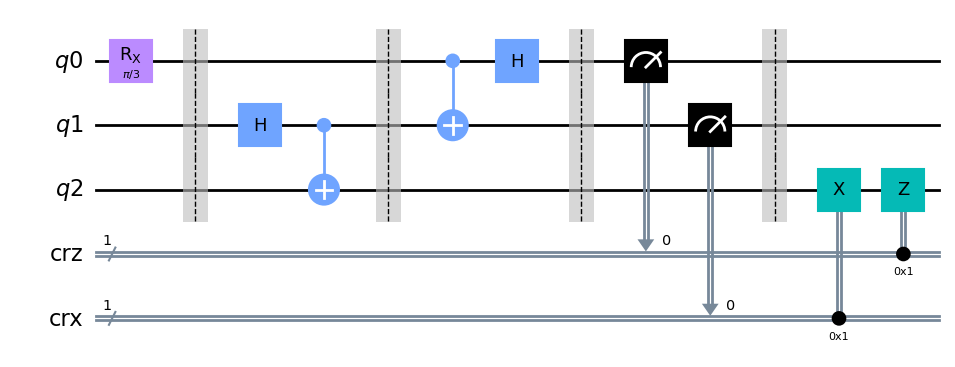

In [117]:
q0 = QuantumRegister(1, name='q0')
q1 = QuantumRegister(1, name='q1')
q2 = QuantumRegister(1, name='q2')

crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx") 

circuit = QuantumCircuit(q0, q1, q2, crz, crx)

circuit.rx(pi/3, q0)
circuit.barrier()

circuit.h(q1)
circuit.cx(q1, q2)
circuit.barrier()

circuit.cx(q0, q1)
circuit.h(q0)
circuit.barrier()
circuit.measure(q0, crz)
circuit.measure(q1, crx)
circuit.barrier()

circuit.x(q2).c_if(crx, 1)
circuit.z(q2).c_if(crz, 1)

circuit.draw(output='mpl', style='clifford')

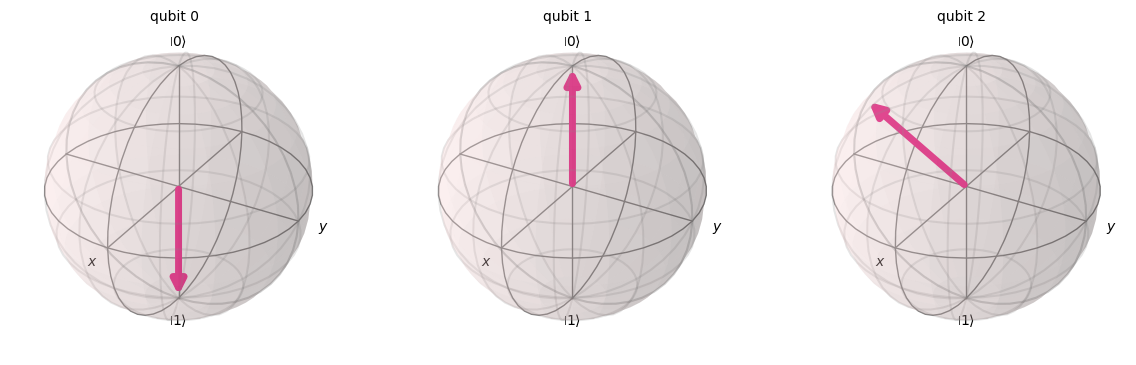

In [118]:
simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit, backend=simulator).result().get_statevector()
plot_bloch_multivector(statevector)

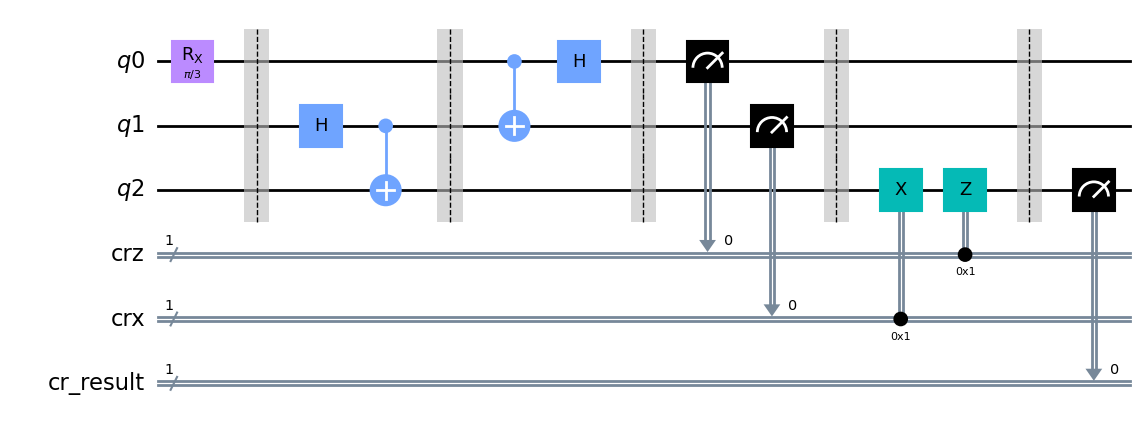

In [119]:
cr_result = ClassicalRegister(1, name="cr_result")
circuit.barrier()
circuit.add_register(cr_result)
circuit.measure(2, 2)
circuit.draw(output='mpl', style='clifford')

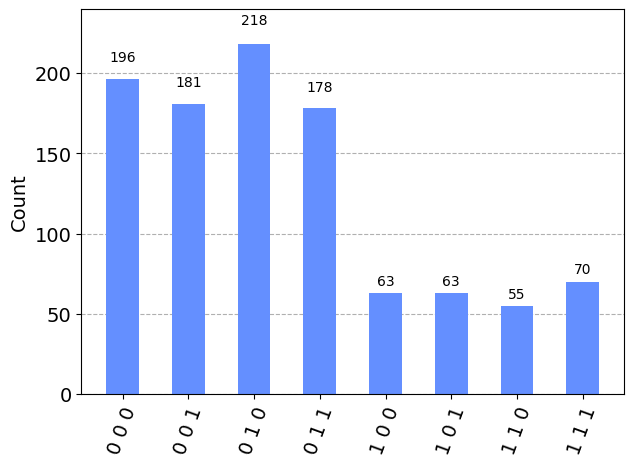

In [120]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts())

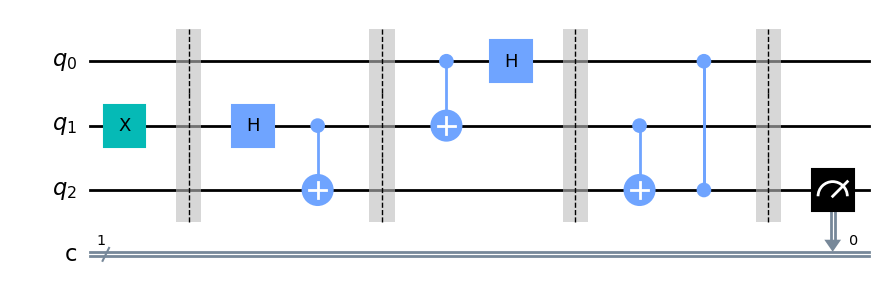

In [121]:
circuit_def = QuantumCircuit(3, 1)

circuit_def.x(1)
circuit_def.barrier()

circuit_def.h(1)
circuit_def.cx(1, 2)
circuit_def.barrier()

circuit_def.cx(0, 1)
circuit_def.h(0)
circuit_def.barrier()

circuit_def.cx(1, 2)
circuit_def.cz(0, 2)
circuit_def.barrier()

circuit_def.measure(2, 0)

circuit_def.draw(output='mpl', style='clifford')

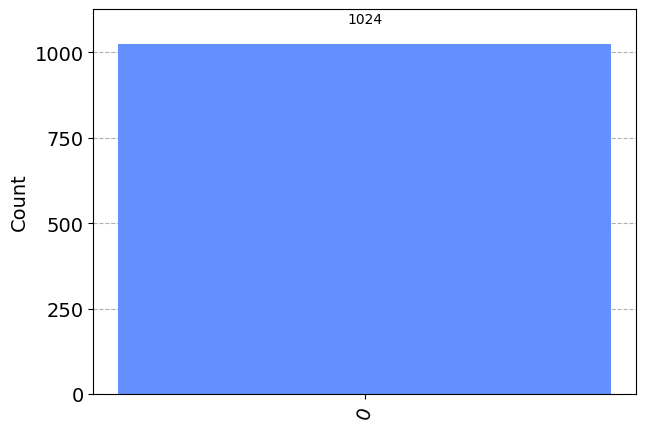

In [122]:
result_def = execute(circuit_def, backend=simulator).result()
plot_histogram(result_def.get_counts())